# assignment 2:

### Basic Imports

In [52]:
import os
import time
import os.path as osp

import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

from torchvision.datasets import CIFAR10
from torchvision import datasets
from torchvision import transforms
import torchvision

from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from PIL import Image
from clip import clip

### Hyperparameters

In [14]:
# # random seed
# SEED = 1 
# NUM_CLASS = 10

# Training
BATCH_SIZE = 128
# NUM_EPOCHS = 30
# EVAL_INTERVAL=1
# SAVE_DIR = './log'

# # Optimizer
# LEARNING_RATE = 1e-1
# MOMENTUM = 0.9
# STEP=5
# GAMMA=0.5

# CLIP
VISUAL_BACKBONE = 'RN50' # RN50, ViT-B/32, ViT-B/16


### Device

In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


### Dataset


In [4]:
#cifar10
transform_cifar10_test = transforms.Compose([
    transforms.Resize(size=224),
    transforms.CenterCrop(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

test_set = torchvision.datasets.CIFAR10(root='/data/dataset/', train=False,
                                       download=True, transform=transform_cifar10_test)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
dataset_name = 'CIFAR10'

Files already downloaded and verified


In [27]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

# Load the dataset using Flowers
# test_set = Flowers(root='/shareddata/flowers-102/', transform=transform)
transform = transforms.Compose([
    transforms.Resize(size=224),
    transforms.CenterCrop(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Load the dataset using ImageFolder
test_set = datasets. ImageFolder(root='/shareddata/flowers-102', transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE,
                                              shuffle=False, num_workers=2)

class_names = [
    'pink_primrose', 'hard-leaved_pocket_orchid', 'canterbury_bells', 'sweet_pea', 'english_marigold',
    'tiger_lily', 'moon_orchid', 'bird_of_paradise', 'monkshood', 'globe_thistle', 'snapdragon',
    'colts_foot', 'king_protea', 'spear_thistle', 'yellow_iris', 'globe-flower', 'purple_coneflower',
    'peruvian_lily', 'balloon_flower', 'giant_white_arum_lily', 'fire_lily', 'pincushion_flower',
    'fritillary', 'red_ginger', 'grape_hyacinth', 'corn_poppy', 'prince_of_wales_feathers', 'stemless_gentian',
]
dataset_name = 'flower'


In [53]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

# Load the dataset using Flowers
transform = transforms.Compose([
    transforms.Resize(size=224),
    transforms.CenterCrop(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Load the dataset using ImageFolder
test_set = datasets. ImageFolder(root='/shareddata/dtd', transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE,
                                              shuffle=False, num_workers=2)

class_names = [
    'banded', 'blotchy', 'braided', 'bubbly', 'bumpy',
    'chequered', 'cobwebbed', 'cracked', 'crosshatched', 'crystalline',
    'dotted', 'fibrous', 'flecked', 'freckled', 'frilly',
    'gauzy', 'grid', 'grooved', 'honeycombed', 'interlaced',
    'knitted', 'lacelike', 'lined', 'marbled', 'matted',
]


dataset_name = 'dtd'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


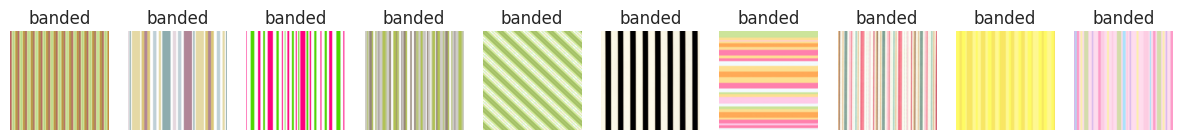

In [47]:
#数据可视化
import matplotlib.pyplot as plt
import torchvision.utils as vutils

# Fetch a batch of images from the test dataloader
data_iter = iter(test_dataloader)
images, labels = next(data_iter)  # Use next() to get the first batch

# Denormalize images for visualization
def denormalize(image):
    mean = torch.tensor([0.4914, 0.4822, 0.4465])
    std = torch.tensor([0.2023, 0.1994, 0.2010])
    return image * std[:, None, None] + mean[:, None, None]

# Visualize the images
fig, axes = plt.subplots(1, 10, figsize=(15, 3))

for i in range(10):
    axes[i].imshow(np.transpose(denormalize(images[i]).numpy(), (1, 2, 0)))
    axes[i].set_title(class_names[labels[i]])
    axes[i].axis('off')

plt.show()



SyntaxError: incomplete input (3518415305.py, line 1)

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch a batch of images from the test dataloader
data_iter = iter(test_dataloader)
images, labels = next(data_iter)  # Use next() to get the first batch

# Denormalize images for visualization
def denormalize(image):
    mean = torch.tensor([0.4914, 0.4822, 0.4465])
    std = torch.tensor([0.2023, 0.1994, 0.2010])
    return image * std[:, None, None] + mean[:, None, None]

# Find the index of the first image with the "braided" label
braided_index = None
for i in range(len(labels)):
    if class_names[labels[i]] == 'braided':
        braided_index = i
        break

# Visualize the image with the "braided" label
if braided_index is not None:
    plt.figure(figsize=(5, 5))
    plt.imshow(np.transpose(denormalize(images[braided_index]).numpy(), (1, 2, 0)))
    plt.title('Braided')
    plt.axis('off')
    plt.show()
else:
    print("No image with the 'braided' label found in the first batch.")


In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch a batch of images from the test dataloader
data_iter = iter(test_dataloader)
images, labels = next(data_iter)  # Use next() to get the first batch

# Denormalize images for visualization
def denormalize(image):
    mean = torch.tensor([0.4914, 0.4822, 0.4465])
    std = torch.tensor([0.2023, 0.1994, 0.2010])
    return image * std[:, None, None] + mean[:, None, None]

# Find the index of the first image with the "snapdragon" label
snapdragon_index = None
for i in range(len(labels)):
    if class_names[labels[i]] == 'snapdragon':
        snapdragon_index = i
        break

# Visualize the image with the "snapdragon" label
if snapdragon_index is not None:
    plt.figure(figsize=(5, 5))
    plt.imshow(np.transpose(denormalize(images[snapdragon_index]).numpy(), (1, 2, 0)))
    plt.title('Snapdragon')
    plt.axis('off')
    plt.show()
else:
    print("No image with the 'snapdragon' label found in the first batch.")


### Model

In [25]:
# Load the model
model, preprocess = clip.load(name=VISUAL_BACKBONE, device=device, download_root='/data/home/wsy/.cache/clip/')
model.to(device)

CLIP(
  (visual): ModifiedResNet(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU(inplace=True)
    (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu3): ReLU(inplace=True)
    (avgpool): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
     

In [19]:
#cnn模型

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

# 定义卷积神经网络模型
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc = nn.Linear(32 * 56 * 56, 10)  # 这里的输入维度需要根据你的数据集进行调整
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


In [11]:
# 定义训练函数
def train(model, train_loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    return epoch_loss

# 设置超参数
num_epochs = 5
learning_rate = 0.001
batch_size = 64
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [18]:


# 加载训练数据和测试数据
train_transform = transforms.Compose([
    transforms.Resize(size=224),
    transforms.CenterCrop(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])
test_transform = transforms.Compose([
    transforms.Resize(size=224),
    transforms.CenterCrop(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])
train_set = test_set
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

# 创建模型并移动到设备上
model = CNN().to(device)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 训练模型
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, optimizer, criterion, device)
    print(f"Epoch {epoch+1}/{num_epochs} – Loss: {train_loss:.4f}")

# 在测试集上评估模型
model.eval()
test_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
test_loss = test_loss / len(test_loader.dataset)
accuracy = correct / total
print(f"Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.4f}")

Epoch 1/5 – Loss: 0.0177
Epoch 2/5 – Loss: 0.0000
Epoch 3/5 – Loss: 0.0000
Epoch 4/5 – Loss: 0.0000
Epoch 5/5 – Loss: 0.0000
Test Loss: 0.0000, Accuracy: 1.0000


### Encode text 

In [21]:
prompt ="it is a picture of sahiohoehuacacpoubcpaucbaubc"

text_inputs = torch.cat([clip.tokenize(f"{prompt} {c}") for c in class_names]).to(device)

### Zero-shot accuracy calculation


In [23]:

def model_inference(model, image):
    """
    Perform one testing batch iteration.
    Args:
        model (torch.nn.Module): The machine learning model to evaluate.
        image (torch.Tensor): Batch of input data (images).
        target (torch.Tensor): Batch of target labels.

    Returns:
        torch.Tensor: Model output (predictions) for the batch.
        torch.Tensor: Loss value calculated for the batch.
    """

    ##################### Write your answer here ##################
    
    image_features = model.encode_image(image)
    text_features = model.encode_text(text_inputs)

    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    logit_scale = model.logit_scale.exp()

    logits = logit_scale * image_features @ text_features.t()

    ###############################################################

    return logits

### Zero-shot Inference

In [39]:
testing_loss = []
testing_acc = []

def denormalize(image):
    mean = torch.tensor([0.4914, 0.4822, 0.4465])
    std = torch.tensor([0.2023, 0.1994, 0.2010])
    return image * std[:, None, None] + mean[:, None, None]

with torch.no_grad():
    model.eval()

    val_loss = 0.0
    val_corrects = 0
    for batch_idx, (image, target) in enumerate(test_dataloader):
        image = image.to(device)
        target = target.to(device)
        # test model
        logits = model_inference(model, image)
        _, preds = torch.max(logits, 1)
        
        val_corrects += torch.sum(preds == target.data)

    val_acc = val_corrects.double() / len(test_set)

    print(f"The zero-shot performance on {dataset_name} is {val_acc*100:.2f}%, visual encoder is {VISUAL_BACKBONE}.")

The zero-shot performance on flower is 42.62%, visual encoder is RN50.


In [ ]:
# !pip install seaborn

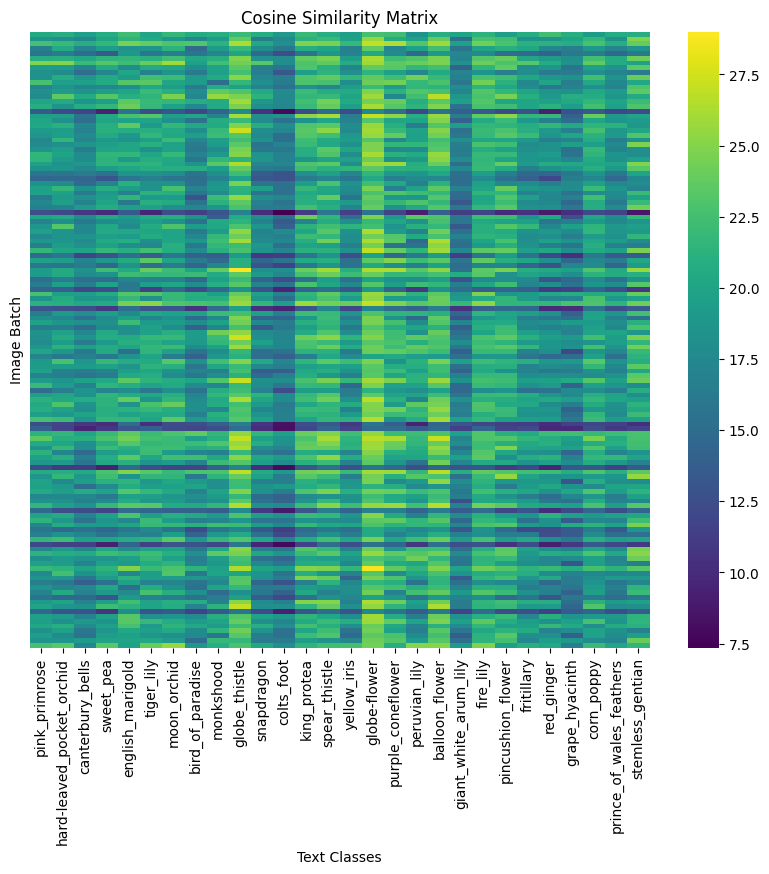

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Previous code)

# Visualize the cosine similarity matrix
with torch.no_grad():
    model.eval()

    
    # Get a batch of image and text pairs
    for image_batch, target_batch in test_dataloader:
        break  # Break after the first batch for visualization

    image_batch = image_batch.to(device)
    text_inputs_batch = torch.cat([clip.tokenize(f"{prompt} {c}") for c in class_names]).to(device)

    # Perform model inference to get cosine similarity matrix
    similarity_matrix = model_inference(model, image_batch)

    # Plot the cosine similarity matrix as a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix.cpu().numpy(), cmap='viridis', xticklabels=class_names, yticklabels=False)
    plt.title('Cosine Similarity Matrix')
    plt.xlabel('Text Classes')
    plt.ylabel('Image Batch')
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


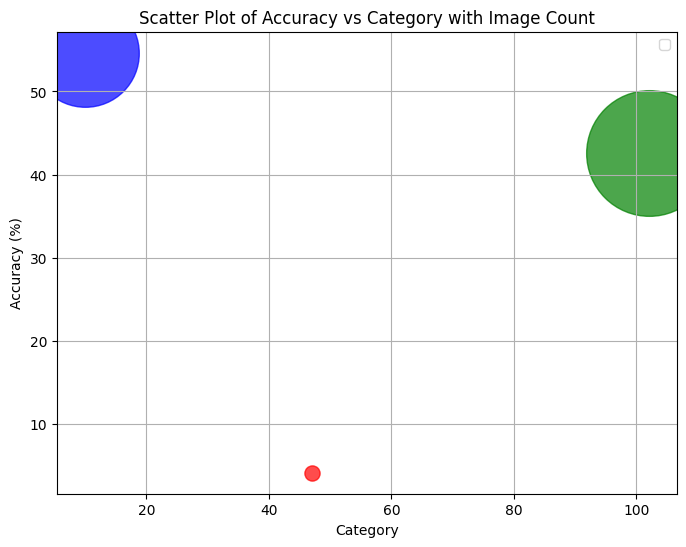

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
accuracies = [54.65, 42.62, 4.18]
categories = [10, 102, 47]
image_counts = [6000, 8189, 120]

# 数据集名称
datasets = ['CIFAR-10', 'Flowers-102', 'DTD']

# 绘制散点图
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']

for i in range(len(datasets)):
    plt.scatter(categories[i], accuracies[i], s=image_counts[i], c=colors[i], alpha=0.7)

plt.xlabel('Category')
plt.ylabel('Accuracy (%)')
plt.title('Scatter Plot of Accuracy vs Category with Image Count')
plt.legend()
plt.grid(True)
plt.show()


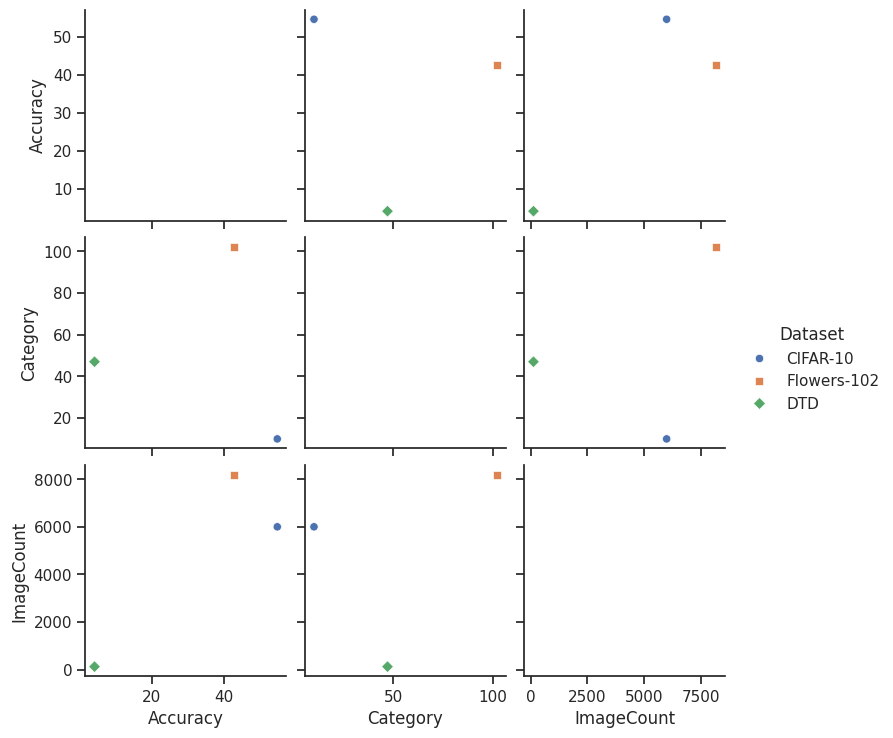

In [39]:
import pandas as pd
import seaborn as sns

# 数据
data = {'Dataset': ['CIFAR-10', 'Flowers-102', 'DTD'],
        'Accuracy': [54.65, 42.62, 4.18],
        'Category': [10, 102, 47],
        'ImageCount': [6000, 8189, 120]}

df = pd.DataFrame(data)

# 散点矩阵
sns.set(style="ticks")
sns.pairplot(df, hue="Dataset", markers=["o", "s", "D"])
plt.show()

